In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

In [4]:
file_1 = "C:/Users/Efrem/Downloads/meesho_statement_2/DICE Challenge Business Analytics Case 2/clicks__data.csv"
file_2 = "C:/Users/Efrem/Downloads/meesho_statement_2/DICE Challenge Business Analytics Case 2/views__data.csv"
file_3 = "C:/Users/Efrem/Downloads/meesho_statement_2/DICE Challenge Business Analytics Case 2/orders__table.csv"

In [5]:
click_data = pd.read_csv(file_1)
view_data = pd.read_csv(file_2)
order_data = pd.read_csv(file_3)
order_data

order_id  order_date  user_id  order_value     category  quantity  \
0              0  2023-09-26    14225      4044.37   Home Goods         1   
1              1  2024-09-08    19369      2969.24     Clothing        10   
2              2  2024-03-08      339      4985.45  Electronics         2   
3              3  2023-11-26    19310      4328.57     Clothing         4   
4              4  2023-11-20    13523      2517.05   Home Goods         1   
...          ...         ...      ...          ...          ...       ...   
999995    999995  2023-10-04    11904       896.17   Home Goods         9   
999996    999996  2023-12-14    83686       828.17     Clothing         5   
999997    999997  2024-07-09    37213      4156.44  Electronics         6   
999998    999998  2024-08-17    99950      4931.21   Home Goods         6   
999999    999999  2023-11-17    70793      2315.64     Clothing         9   

       order_status  supplier_id           feedback  
0         cancelled          565  Negative feedback  
1         cancelled          222  Positive feedback  
2         cancelled          907   Neutral feedback  
3         delivered          176   Neutral feedback  
4         delivered          207  Negative feedback  
...             ...          ...                ...  
999995    cancelled          769  Negative feedback  
999996     returned          968  Positive feedback  
999997    delivered          745   Neutral feedback  
999998    exchanged          423  Negative feedback  
999999          RTO           37   Neutral feedback  

[1000000 rows x 9 columns]

In [6]:
data = order_data.copy()
data['clicks_count'] = click_data['clicks_count']
data['app_open_count'] = view_data['app_open_count']
data

order_id  order_date  user_id  order_value     category  quantity  \
0              0  2023-09-26    14225      4044.37   Home Goods         1   
1              1  2024-09-08    19369      2969.24     Clothing        10   
2              2  2024-03-08      339      4985.45  Electronics         2   
3              3  2023-11-26    19310      4328.57     Clothing         4   
4              4  2023-11-20    13523      2517.05   Home Goods         1   
...          ...         ...      ...          ...          ...       ...   
999995    999995  2023-10-04    11904       896.17   Home Goods         9   
999996    999996  2023-12-14    83686       828.17     Clothing         5   
999997    999997  2024-07-09    37213      4156.44  Electronics         6   
999998    999998  2024-08-17    99950      4931.21   Home Goods         6   
999999    999999  2023-11-17    70793      2315.64     Clothing         9   

       order_status  supplier_id           feedback  clicks_count  \
0         cancelled          565  Negative feedback             1   
1         cancelled          222  Positive feedback            11   
2         cancelled          907   Neutral feedback            44   
3         delivered          176   Neutral feedback            37   
4         delivered          207  Negative feedback            10   
...             ...          ...                ...           ...   
999995    cancelled          769  Negative feedback            16   
999996     returned          968  Positive feedback             7   
999997    delivered          745   Neutral feedback             6   
999998    exchanged          423  Negative feedback             5   
999999          RTO           37   Neutral feedback             3   

        app_open_count  
0                    4  
1                   46  
2                   48  
3                   42  
4                   19  
...                ...  
999995              35  
999996              27  
999997               7  
999998               8  
999999              15  

[1000000 rows x 11 columns]

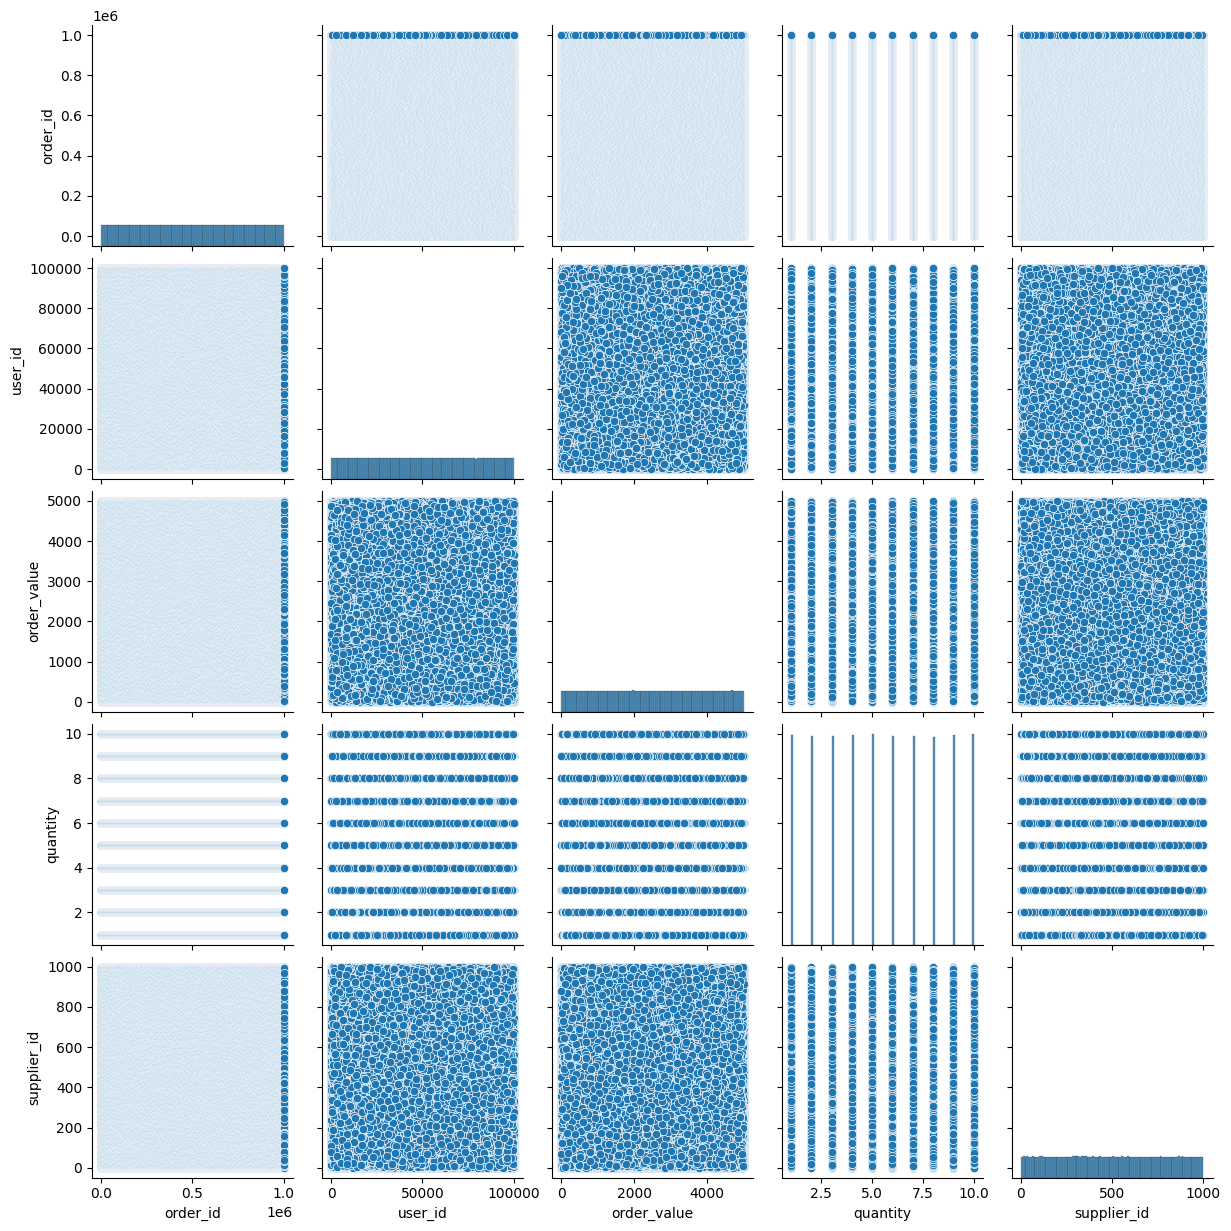

In [7]:
sns.pairplot(order_data)

In [8]:
# Filter where category is 'Electronics' and order_status is 'delivered'
filtered_data = data[(data['category'] == 'Electronics') & (data['order_status'] == 'delivered')]
filtered_data

order_id  order_date  user_id  order_value     category  quantity  \
33            33  2024-09-08    25475      4204.98  Electronics         1   
34            34  2024-04-13    74927      4851.05  Electronics         4   
43            43  2024-08-24      697      4544.74  Electronics         5   
62            62  2024-05-31    38606       465.27  Electronics         9   
79            79  2024-04-09    50922      2401.57  Electronics        10   
...          ...         ...      ...          ...          ...       ...   
999918    999918  2024-09-02    52983       141.85  Electronics         9   
999963    999963  2024-08-25    75789      3863.23  Electronics         9   
999976    999976  2024-06-03    73587      3579.33  Electronics         3   
999993    999993  2023-10-03     7913       383.96  Electronics         5   
999997    999997  2024-07-09    37213      4156.44  Electronics         6   

       order_status  supplier_id           feedback  clicks_count  \
33        delivered          737  Negative feedback            16   
34        delivered           91  Positive feedback             0   
43        delivered          101  Positive feedback            16   
62        delivered          673  Negative feedback             0   
79        delivered           72  Positive feedback            10   
...             ...          ...                ...           ...   
999918    delivered          590   Neutral feedback            14   
999963    delivered           46  Negative feedback            10   
999976    delivered           79  Positive feedback            18   
999993    delivered          917  Negative feedback            23   
999997    delivered          745   Neutral feedback             6   

        app_open_count  
33                  46  
34                   1  
43                  48  
62                   0  
79                  14  
...                ...  
999918              17  
999963              24  
999976              31  
999993              48  
999997               7  

[60461 rows x 11 columns]

In [9]:
orders_table = pd.DataFrame(data)

# Convert 'order_date' to datetime
orders_table['order_date'] = pd.to_datetime(orders_table['order_date'])

# Extract year and month for grouping
orders_table['year'] = orders_table['order_date'].dt.year
orders_table['month'] = orders_table['order_date'].dt.month
orders_table['day'] = orders_table['order_date'].dt.day

# Create a grouped DataFrame with monthly orders
monthly_orders = orders_table.groupby(['year', 'month', 'day', 'category']).agg({
    'order_id': 'count',         # Count of orders per month
    'order_value': 'sum',        # Total order value per month
    'quantity': 'sum'            # Total quantity of items per month
}).reset_index()

# Rename columns for clarity
monthly_orders.rename(columns={'order_id': 'total_orders', 'order_value': 'total_order_value'}, inplace=True)
monthly_orders

year  month  day     category  total_orders  total_order_value  quantity
0     2023      9   12     Clothing          1089         2706649.25      6038
1     2023      9   12  Electronics           815         2019338.71      4556
2     2023      9   12   Home Goods           775         1902510.74      4275
3     2023      9   13     Clothing          1120         2790316.61      6059
4     2023      9   13  Electronics           834         2152385.17      4666
...    ...    ...  ...          ...           ...                ...       ...
1090  2024      9    9  Electronics           805         2050009.26      4396
1091  2024      9    9   Home Goods           733         1838999.65      4112
1092  2024      9   10     Clothing          1141         2832815.45      6357
1093  2024      9   10  Electronics           829         2100573.59      4648
1094  2024      9   10   Home Goods           824         2071121.24      4627

[1095 rows x 7 columns]

In [10]:
# Mapping the 'category' column to 0, 1, 2
category_mapping = {'Clothing': 0, 'Electronics': 1, 'Home Goods': 2}
monthly_orders['category'] = monthly_orders['category'].map(category_mapping)
monthly_orders

year  month  day  category  total_orders  total_order_value  quantity
0     2023      9   12         0          1089         2706649.25      6038
1     2023      9   12         1           815         2019338.71      4556
2     2023      9   12         2           775         1902510.74      4275
3     2023      9   13         0          1120         2790316.61      6059
4     2023      9   13         1           834         2152385.17      4666
...    ...    ...  ...       ...           ...                ...       ...
1090  2024      9    9         1           805         2050009.26      4396
1091  2024      9    9         2           733         1838999.65      4112
1092  2024      9   10         0          1141         2832815.45      6357
1093  2024      9   10         1           829         2100573.59      4648
1094  2024      9   10         2           824         2071121.24      4627

[1095 rows x 7 columns]

### Uniform sales all throughout the year - everyday and every month 

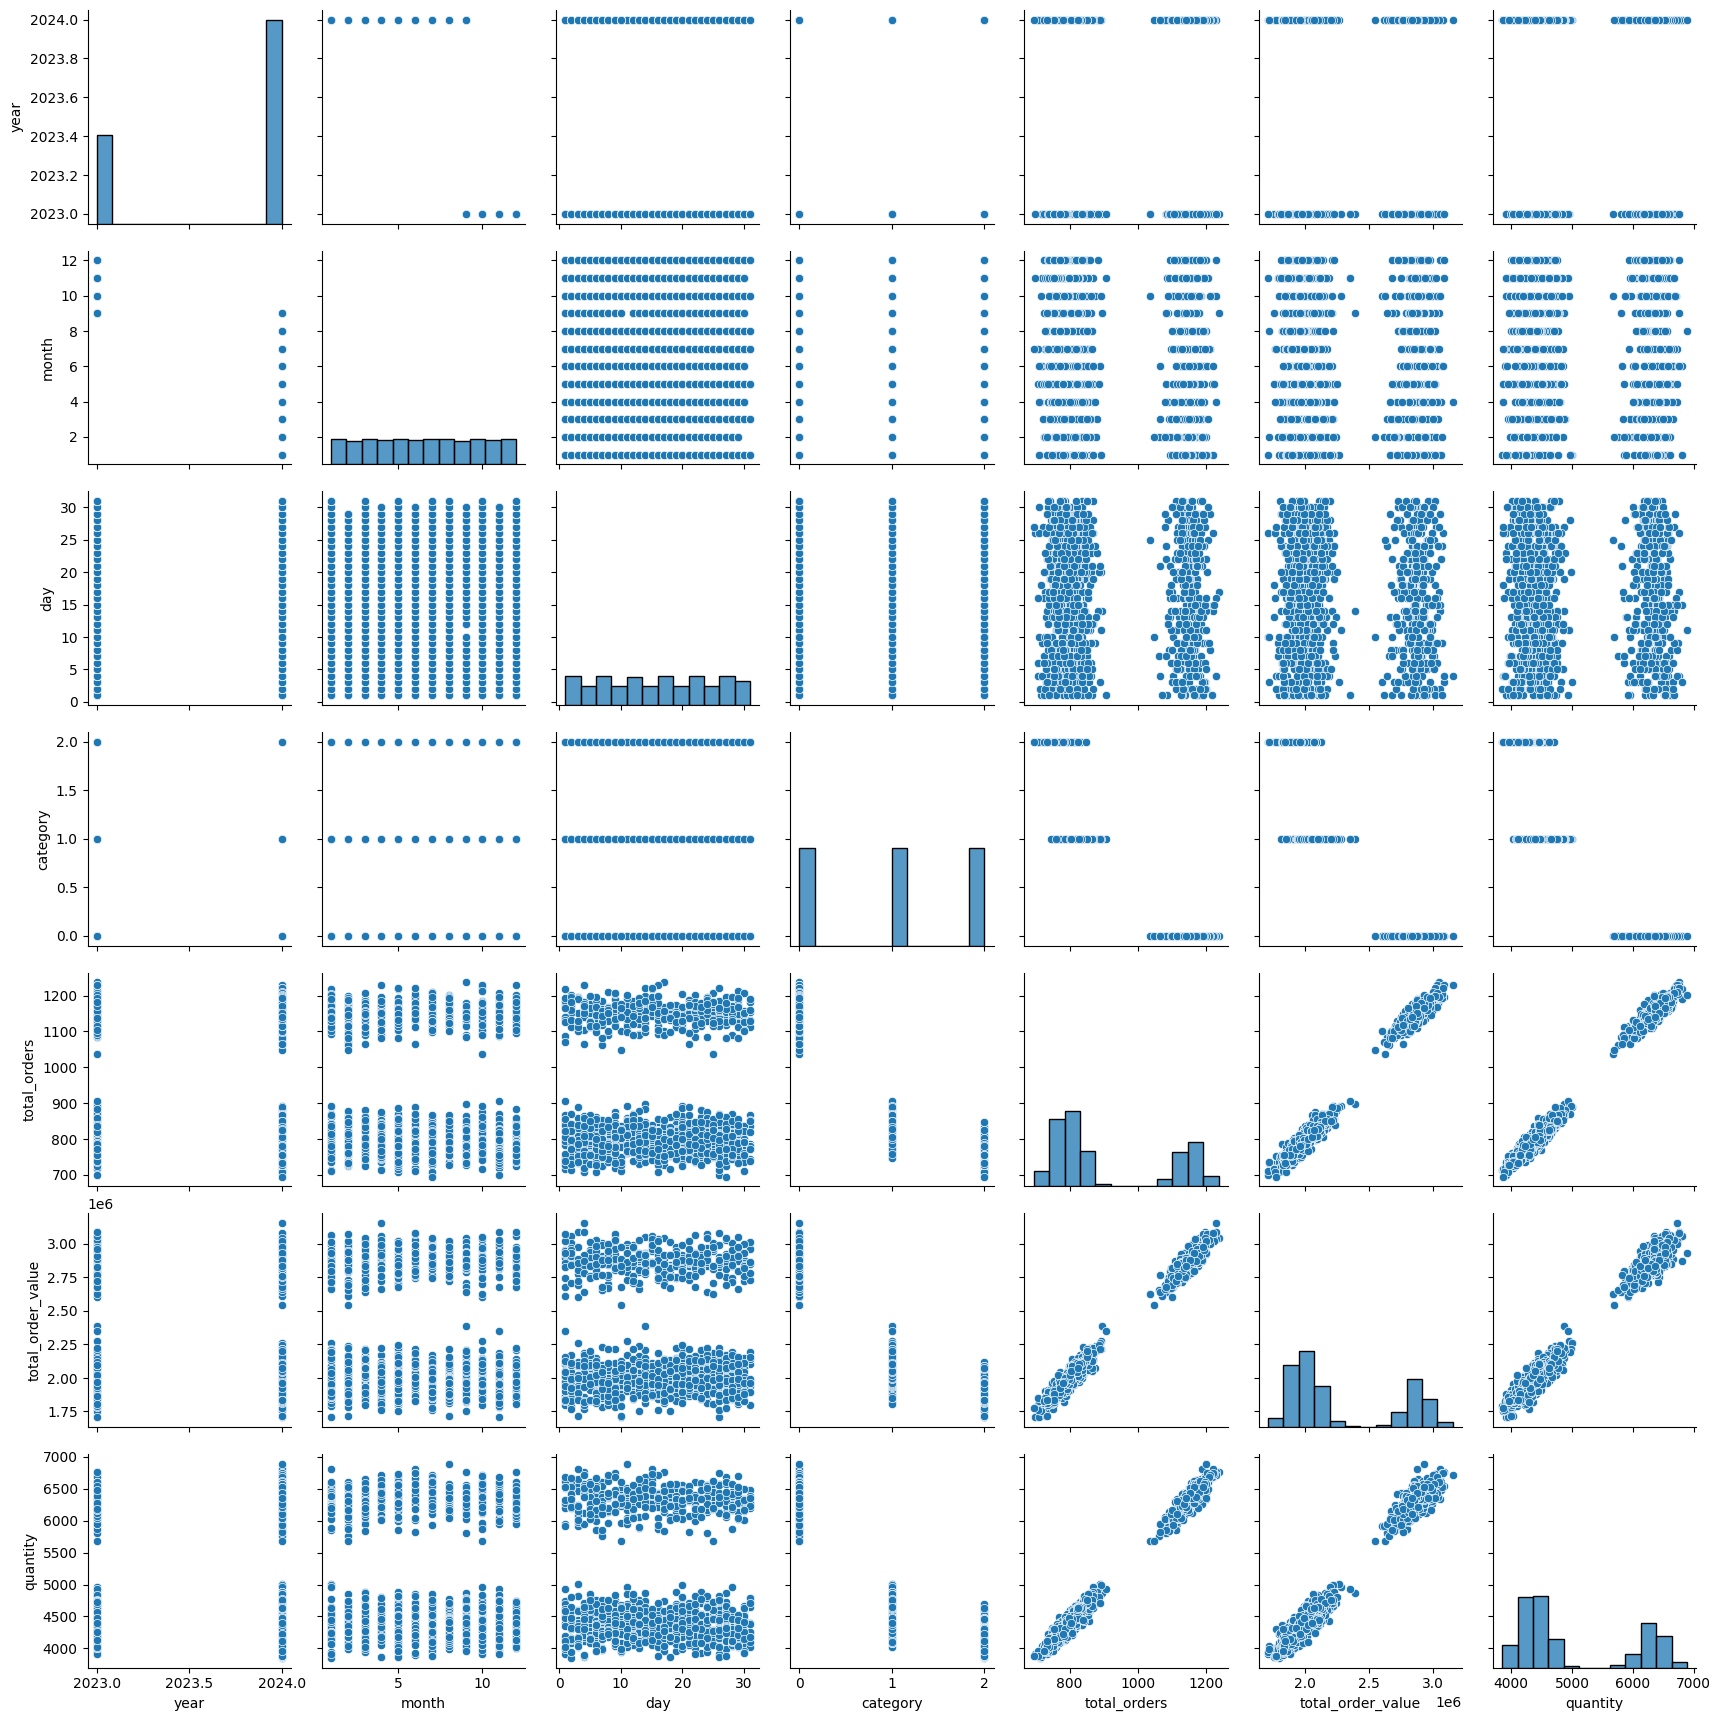

In [11]:
sns.pairplot(monthly_orders)

In [12]:
sample = data.sample(frac = 0.001, random_state = 42)
sample

order_id  order_date  user_id  order_value     category  quantity  \
987231    987231  2024-07-14    14454      1865.35  Electronics         3   
79954      79954  2023-10-08    25080      2076.86   Home Goods        10   
567130    567130  2024-08-09    98199      2177.09  Electronics         6   
500891    500891  2023-12-11    16479      4002.62  Electronics         5   
55399      55399  2024-01-16    69695      2206.09  Electronics         3   
...          ...         ...      ...          ...          ...       ...   
914398    914398  2023-12-04    25147      3834.89  Electronics        10   
189053    189053  2023-10-19    45506      3873.86   Home Goods         4   
47977      47977  2024-07-27     2612      3341.65   Home Goods         4   
600785    600785  2024-05-08    55648      4049.79     Clothing         2   
67400      67400  2024-03-04    43993       825.57  Electronics         1   

       order_status  supplier_id           feedback  clicks_count  \
987231    delivered          594  Positive feedback             9   
79954     exchanged          573  Positive feedback             0   
567130    delivered          682  Positive feedback            11   
500891          RTO          324  Negative feedback             7   
55399     delivered          595   Neutral feedback            29   
...             ...          ...                ...           ...   
914398    exchanged          484   Neutral feedback            28   
189053          RTO            5   Neutral feedback            31   
47977     cancelled          723  Negative feedback             9   
600785    exchanged          680  Negative feedback             0   
67400     delivered          228  Negative feedback            42   

        app_open_count  
987231              26  
79954                9  
567130              23  
500891              17  
55399               43  
...                ...  
914398              32  
189053              38  
47977               31  
600785               8  
67400               45  

[1000 rows x 11 columns]

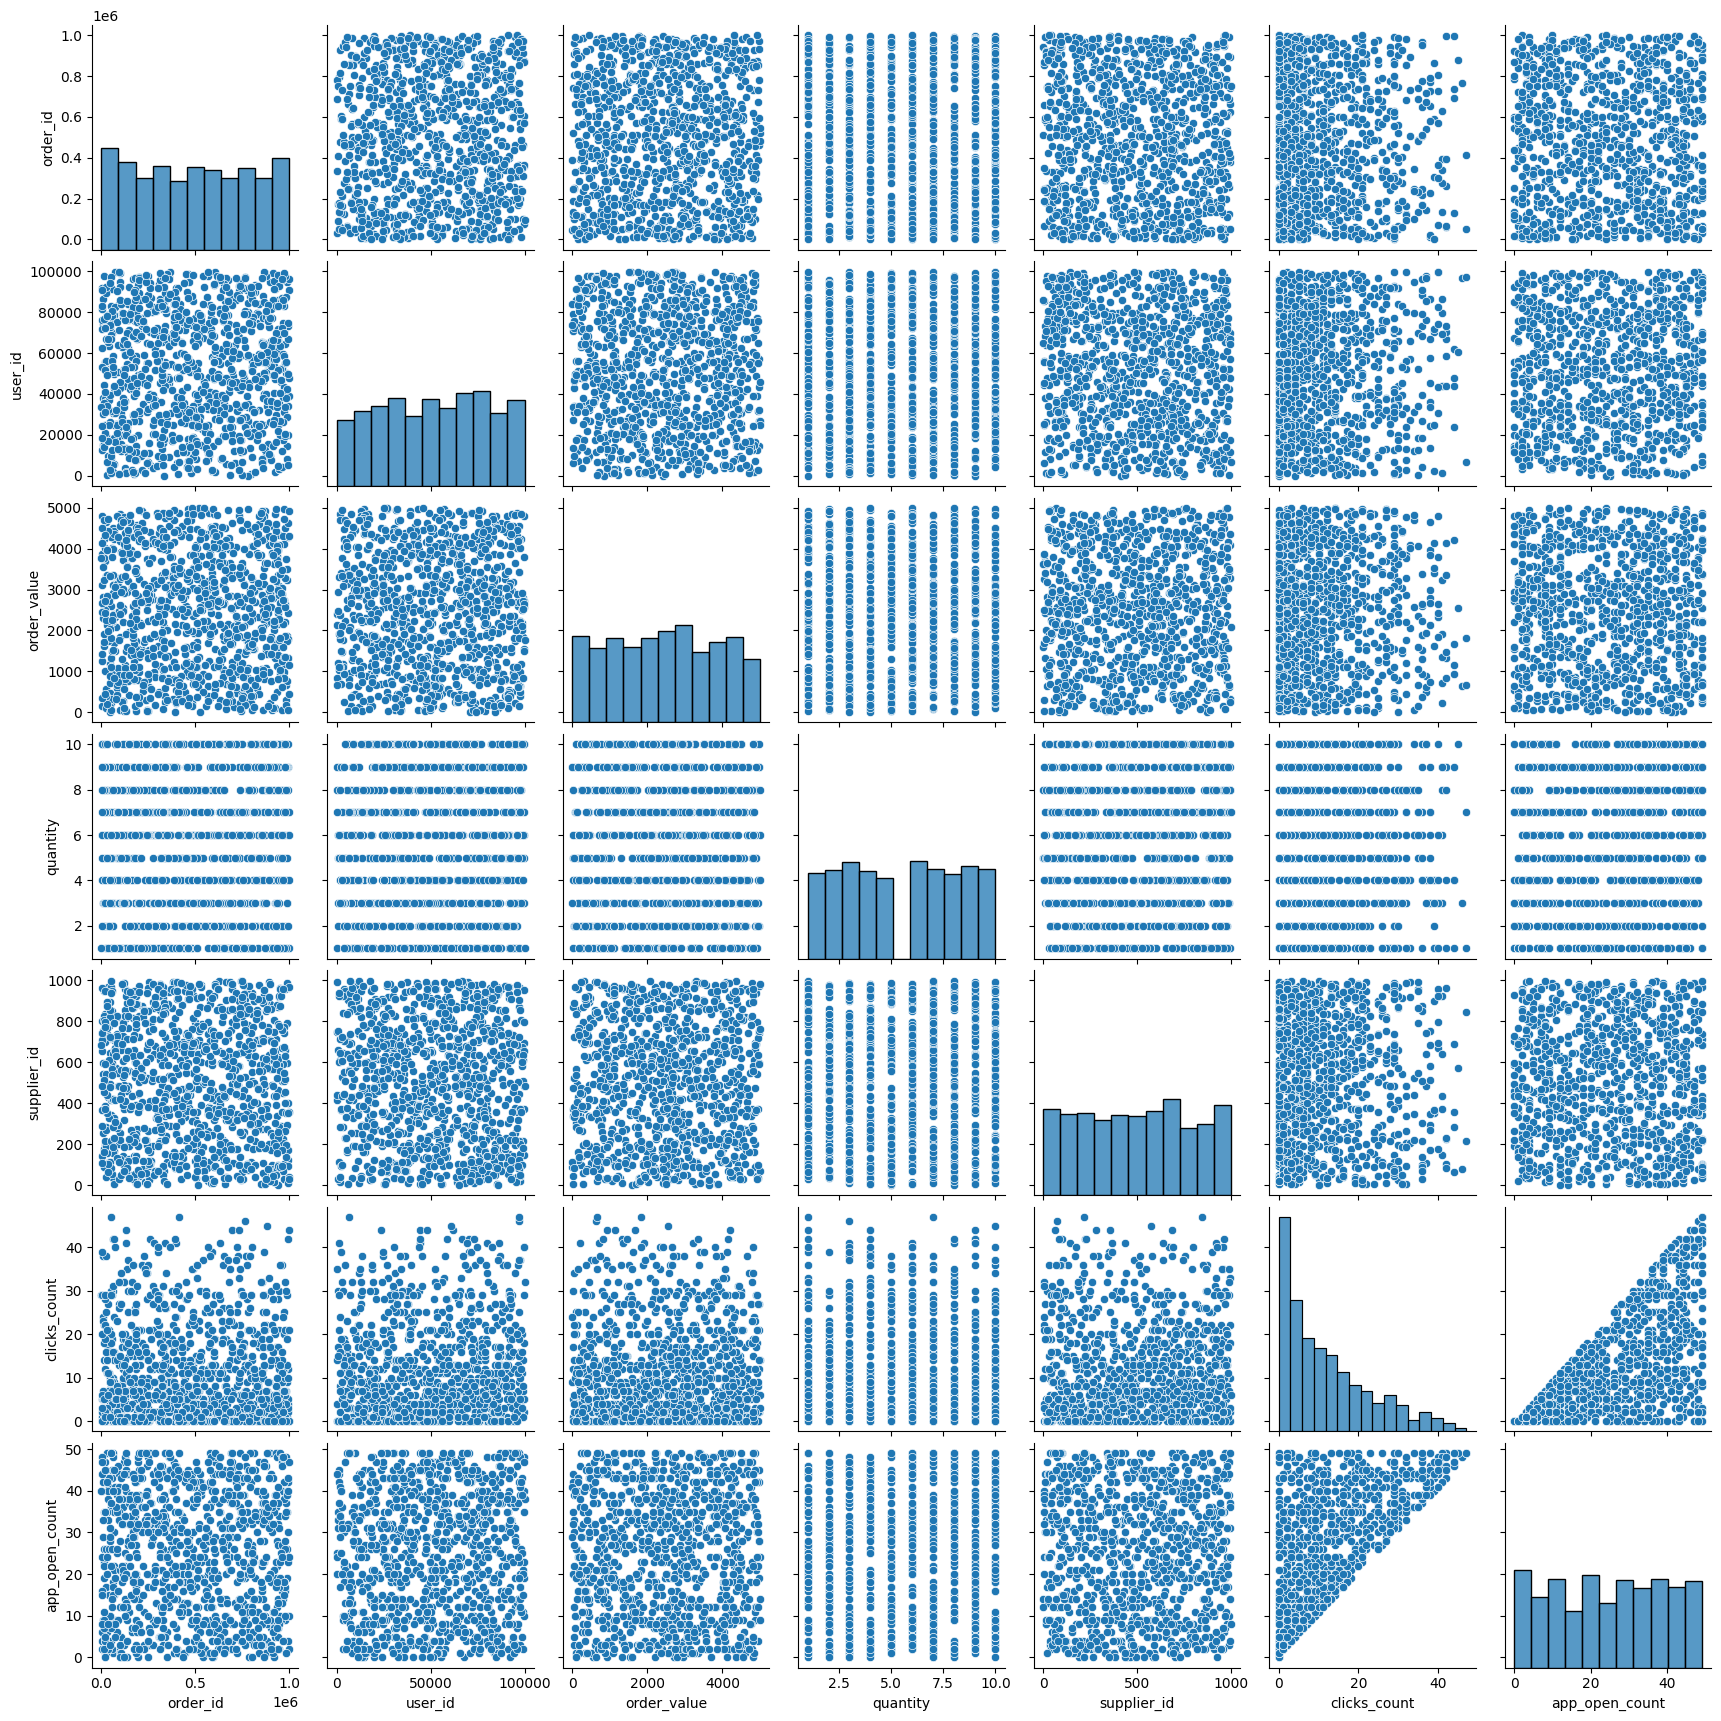

In [13]:
sns.pairplot(sample)

<Axes: >

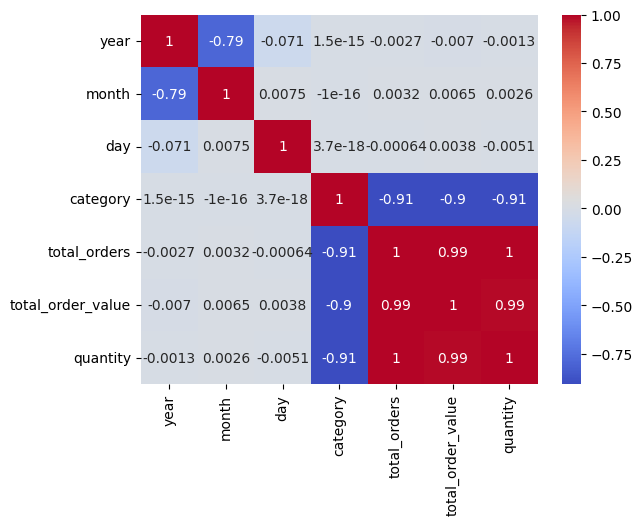

In [14]:
# Correlation heatmap
sns.heatmap(monthly_orders.corr(), annot=True, cmap='coolwarm')

In [15]:
max_date = data['order_date'].max()
min_date = data['order_date'].min()
unique_customers = data['user_id'].nunique()
unique_suppliers = data['supplier_id'].nunique()
total_orders = data['order_id'].nunique()
total_quantity = data['quantity'].sum()
total_sales = data['order_value'].sum()

print(f"Date Range : {min_date} to {max_date}")
print(f"Total number of Customers : {unique_customers}")
print(f"Total number of Suppliers : {unique_suppliers}")
print(f"Total number of Orders : {total_orders}")
print(f"Total number of Quantity Sold : {total_quantity}")
print(f"Total Sales : {total_sales}")

Date Range : 2023-09-12 to 2024-09-10
Total number of Customers : 99989
Total number of Suppliers : 1000
Total number of Orders : 1000000
Total number of Quantity Sold : 5500335
Total Sales : 2500132333.99


In [16]:
data['order_date'] = pd.to_datetime(data['order_date'])
# Revenue = Number of delivered / excahnged orders : Remember to modify accordingly.

customer_profiles = data.groupby('user_id').agg({'order_date' : lambda x : (x.max() - x.min()).days,
                                                'order_id' : lambda x : len(x),
                                                'order_value' : lambda x : sum(x)})
customer_profiles.columns = ['Age', 'Frequency', 'Revenue']

# Age - How long they've been a customer?
# Frequency - How many orders have they placed?
# Revenue - Net value from them

customer_profiles

Age  Frequency  Revenue
user_id                         
1        245         14 37243.57
2        294         13 25884.81
3        326          8 14347.90
4        300         14 33029.83
5        311          9 24505.17
...      ...        ...      ...
99996    347         10 26316.12
99997    217          8 27655.35
99998    309         11 24003.29
99999    335         12 29525.36
100000   223          8 24291.23

[99989 rows x 3 columns]

In [17]:
customer_profiles[customer_profiles['Frequency'] > 5]

Age  Frequency  Revenue
user_id                         
1        245         14 37243.57
2        294         13 25884.81
3        326          8 14347.90
4        300         14 33029.83
5        311          9 24505.17
...      ...        ...      ...
99996    347         10 26316.12
99997    217          8 27655.35
99998    309         11 24003.29
99999    335         12 29525.36
100000   223          8 24291.23

[93252 rows x 3 columns]

In [18]:
# LIBRARIES ------
import pandas as pd
import pytimetk as tk
import pycaret.classification as clf
import pycaret.regression as reg

In [19]:
# CONSTANTS -----
profit_margin = 0.15          # Assuming 15% profit on products


In [20]:
# DATA -------
data 

order_id order_date  user_id  order_value     category  quantity  \
0              0 2023-09-26    14225      4044.37   Home Goods         1   
1              1 2024-09-08    19369      2969.24     Clothing        10   
2              2 2024-03-08      339      4985.45  Electronics         2   
3              3 2023-11-26    19310      4328.57     Clothing         4   
4              4 2023-11-20    13523      2517.05   Home Goods         1   
...          ...        ...      ...          ...          ...       ...   
999995    999995 2023-10-04    11904       896.17   Home Goods         9   
999996    999996 2023-12-14    83686       828.17     Clothing         5   
999997    999997 2024-07-09    37213      4156.44  Electronics         6   
999998    999998 2024-08-17    99950      4931.21   Home Goods         6   
999999    999999 2023-11-17    70793      2315.64     Clothing         9   

       order_status  supplier_id           feedback  clicks_count  \
0         cancelled          565  Negative feedback             1   
1         cancelled          222  Positive feedback            11   
2         cancelled          907   Neutral feedback            44   
3         delivered          176   Neutral feedback            37   
4         delivered          207  Negative feedback            10   
...             ...          ...                ...           ...   
999995    cancelled          769  Negative feedback            16   
999996     returned          968  Positive feedback             7   
999997    delivered          745   Neutral feedback             6   
999998    exchanged          423  Negative feedback             5   
999999          RTO           37   Neutral feedback             3   

        app_open_count  
0                    4  
1                   46  
2                   48  
3                   42  
4                   19  
...                ...  
999995              35  
999996              27  
999997               7  
999998               8  
999999              15  

[1000000 rows x 11 columns]

In [21]:
# MACHINE LEARNING -----
# Frame the problem :
# - What will the customers spend in the next 90 - Days? (Expected Revenue) >> Regression
# - What is the probability of a customer to make a purchase in the next 90 days? (Churn Rate) >> Classification

n_days = 90
max_date = data['order_date'].max()
cutoff = max_date - pd.to_timedelta(n_days, unit = "d")
cutoff

Timestamp('2024-06-12 00:00:00')

In [22]:
# Train-Test Split
temporal_in_data = data[data['order_date'] < cutoff]
temporal_out_data = data[data['order_date'] >= cutoff]\
                        .query('user_id in @temporal_in_data.user_id')
temporal_out_data.glimpse()

<class 'pandas.core.frame.DataFrame'>: 249208 rows of 11 columns
order_id:        int64             [1, 6, 17, 21, 24, 25, 26, 27, 31, 33 ...
order_date:      datetime64[ns]    [Timestamp('2024-09-08 00:00:00'), Ti ...
user_id:         int64             [19369, 60030, 90055, 97604, 74900, 7 ...
order_value:     float64           [2969.24, 4605.76, 4998.3, 3933.68, 1 ...
category:        object            ['Clothing', 'Electronics', 'Home Goo ...
quantity:        int64             [10, 1, 8, 1, 4, 10, 5, 9, 10, 1, 5,  ...
order_status:    object            ['cancelled', 'exchanged', 'RTO', 'RT ...
supplier_id:     int64             [222, 679, 592, 478, 215, 281, 582, 6 ...
feedback:        object            ['Positive feedback', 'Neutral feedba ...
clicks_count:    int64             [11, 5, 0, 12, 4, 15, 12, 9, 8, 16, 4 ...
app_open_count:  int64             [46, 23, 11, 39, 9, 29, 19, 19, 15, 4 ...


In [23]:
# FEATURE ENGINEERING ----
# Make Targets from out data ----
targets_data = temporal_out_data[['user_id','order_value']]\
                    .groupby('user_id')\
                    .sum()\
                    .rename({'order_value':'90_day_order_value'}, axis = 1)\
                    .assign(order_value_90_flag = 1)
targets_data

90_day_order_value  order_value_90_flag
user_id                                         
1                   4933.51                    1
2                   6034.06                    1
3                   1388.50                    1
4                   5062.14                    1
5                   8848.79                    1
...                     ...                  ...
99996               3200.63                    1
99997               9779.06                    1
99998               4174.99                    1
99999               4695.08                    1
100000              3666.15                    1

[91649 rows x 2 columns]

In [24]:
# Make Recency (Date) Features from in data -----
max_date = temporal_in_data['order_date'].max()
recency_features_data = temporal_in_data[['user_id','order_date']]\
                        .groupby('user_id')\
                        .apply(lambda x : int((x['order_date'].max() - max_date) / pd.to_timedelta(1,"day")))\
                        .to_frame()\
                        .set_axis(["recency"], axis = 1)
recency_features_data

recency
user_id         
1            -14
2             -3
3            -32
4             -5
5           -131
...          ...
99996         -8
99997         -8
99998        -41
99999         -8
100000       -22

[99927 rows x 1 columns]

In [25]:
# Make Frequency (Count) Features from in data ------
frequency_features_data = temporal_in_data[['user_id','order_date']]\
                          .groupby('user_id')\
                          .count()\
                          .set_axis(['frequency'], axis = 1)
frequency_features_data

frequency
user_id           
1               12
2               10
3                6
4               12
5                6
...            ...
99996            9
99997            5
99998            9
99999           10
100000           7

[99927 rows x 1 columns]

In [26]:
# Make Monetary Features from in data -----
monetary_features_data = temporal_in_data\
                         .groupby('user_id')\
                         .aggregate({'order_value' : ['sum','mean']})\
                         .set_axis(['order_value_sum','order_value_mean'], axis = 1)
monetary_features_data

order_value_sum  order_value_mean
user_id                                   
1               32310.06           2692.50
2               19850.75           1985.08
3               12959.40           2159.90
4               27967.69           2330.64
5               15656.38           2609.40
...                  ...               ...
99996           23115.49           2568.39
99997           17876.29           3575.26
99998           19828.30           2203.14
99999           24830.28           2483.03
100000          20625.08           2946.44

[99927 rows x 2 columns]

In [27]:
# OTHER FEATURES ------
temporal_in_data.glimpse()

<class 'pandas.core.frame.DataFrame'>: 750635 rows of 11 columns
order_id:        int64             [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12,  ...
order_date:      datetime64[ns]    [Timestamp('2023-09-26 00:00:00'), Ti ...
user_id:         int64             [14225, 339, 19310, 13523, 38526, 583 ...
order_value:     float64           [4044.37, 4985.45, 4328.57, 2517.05,  ...
category:        object            ['Home Goods', 'Electronics', 'Clothi ...
quantity:        int64             [1, 2, 4, 1, 10, 7, 8, 4, 10, 3, 6, 4 ...
order_status:    object            ['cancelled', 'cancelled', 'delivered ...
supplier_id:     int64             [565, 907, 176, 207, 658, 210, 35, 44 ...
feedback:        object            ['Negative feedback', 'Neutral feedba ...
clicks_count:    int64             [1, 44, 37, 10, 12, 16, 19, 0, 6, 4,  ...
app_open_count:  int64             [4, 48, 42, 19, 47, 36, 35, 3, 26, 21 ...


In [28]:
# Transactions within the Last Month
cutoff_28d = cutoff - pd.to_timedelta(28, unit = "d")
transactions_last_month_data = temporal_in_data[['user_id','order_date']]\
                               .drop_duplicates()\
                               .query('order_date >= @cutoff_28d')\
                               .groupby('user_id')\
                               .size()\
                               .to_frame()\
                               .set_axis(['transactions_last_month'], axis = 1) 
transactions_last_month_data

transactions_last_month
user_id                         
1                              1
2                              2
4                              1
7                              1
9                              1
...                          ...
99994                          1
99996                          1
99997                          2
99999                          4
100000                         2

[53782 rows x 1 columns]

In [29]:
# Transactions Last 2 Weeks
cutoff_14d = cutoff - pd.to_timedelta(14, unit = "d")
transactions_last_2weeks_data = temporal_in_data[['user_id','order_date']]\
                               .drop_duplicates()\
                               .query('order_date >= @cutoff_14d')\
                               .groupby('user_id')\
                               .size()\
                               .to_frame()\
                               .set_axis(['transactions_last_2weeks'], axis = 1)  
transactions_last_2weeks_data

transactions_last_2weeks
user_id                          
2                               1
4                               1
10                              1
16                              2
18                              1
...                           ...
99991                           1
99993                           1
99996                           1
99997                           1
99999                           3

[32002 rows x 1 columns]

In [30]:
# Spend/Revenue Last 2 Weeks
cutoff_14d = cutoff - pd.to_timedelta(14, unit = "d")
sales_last_2weeks_data = temporal_in_data[['user_id','order_date','order_value']]\
                               .drop_duplicates()\
                               .query('order_date >= @cutoff_14d')\
                               .groupby('user_id')\
                               .agg({'order_value': 'sum'})\
                               .set_axis(['sales_last_2weeks'], axis = 1)  
sales_last_2weeks_data

sales_last_2weeks
user_id                   
2                  5289.55
4                  1585.51
10                 9108.87
16                 3453.91
18                  895.48
...                    ...
99991              2204.96
99993              2840.04
99996               825.42
99997              3314.92
99999              8696.71

[32002 rows x 1 columns]

In [31]:
# COMBINE FEATURES ------
features_data = pd.concat([recency_features_data, frequency_features_data, monetary_features_data, transactions_last_month_data, transactions_last_2weeks_data, sales_last_2weeks_data], axis = 1)\
                .merge(targets_data, left_index = True, right_index = True, how = 'left')\
                .fillna(0)
features_data

recency  frequency  order_value_sum  order_value_mean  \
user_id                                                          
1            -14         12         32310.06           2692.50   
2             -3         10         19850.75           1985.08   
3            -32          6         12959.40           2159.90   
4             -5         12         27967.69           2330.64   
5           -131          6         15656.38           2609.40   
...          ...        ...              ...               ...   
99996         -8          9         23115.49           2568.39   
99997         -8          5         17876.29           3575.26   
99998        -41          9         19828.30           2203.14   
99999         -8         10         24830.28           2483.03   
100000       -22          7         20625.08           2946.44   

         transactions_last_month  transactions_last_2weeks  sales_last_2weeks  \
user_id                                                                         
1                           1.00                      0.00               0.00   
2                           2.00                      1.00            5289.55   
3                           0.00                      0.00               0.00   
4                           1.00                      1.00            1585.51   
5                           0.00                      0.00               0.00   
...                          ...                       ...                ...   
99996                       1.00                      1.00             825.42   
99997                       2.00                      1.00            3314.92   
99998                       0.00                      0.00               0.00   
99999                       4.00                      3.00            8696.71   
100000                      2.00                      0.00               0.00   

         90_day_order_value  order_value_90_flag  
user_id                                           
1                   4933.51                 1.00  
2                   6034.06                 1.00  
3                   1388.50                 1.00  
4                   5062.14                 1.00  
5                   8848.79                 1.00  
...                     ...                  ...  
99996               3200.63                 1.00  
99997               9779.06                 1.00  
99998               4174.99                 1.00  
99999               4695.08                 1.00  
100000              3666.15                 1.00  

[99927 rows x 9 columns]

In [32]:
# MACHINE LEARNING -----
# - Will use pycaret to quickly build a predictive model
# REGRESSION ---------
reg_setup = reg.setup(
            data = features_data.drop('order_value_90_flag', axis = 1),
            target = '90_day_order_value',
            train_size = 0.8,
            normalize = True,
            session_id = 123,
            verbose = True,
            log_experiment = False)
xgb_reg_model = reg.create_model('xgboost')
reg_predictions_data = reg.predict_model(xgb_reg_model, data = features_data)\
                       .sort_values('prediction_label', ascending = False) 

In [33]:
reg_predictions_data

recency  frequency  order_value_sum  order_value_mean  \
user_id                                                          
40532        -23         12         15710.43           1309.20   
27075       -212          2          4681.31           2340.66   
93990         -4          3          3916.39           1305.46   
49226          0          9         12103.05           1344.78   
1214           0         11         32207.41           2927.95   
...          ...        ...              ...               ...   
13715        -58         16         30110.46           1881.90   
95565          0          3          9121.81           3040.60   
83253         -8          4          5366.83           1341.71   
18828        -12          9         21154.99           2350.55   
97474         -8          3          8475.78           2825.26   

         transactions_last_month  transactions_last_2weeks  sales_last_2weeks  \
user_id                                                                         
40532                       1.00                      0.00               0.00   
27075                       0.00                      0.00               0.00   
93990                       2.00                      2.00            2814.62   
49226                       1.00                      1.00            1388.58   
1214                        2.00                      2.00            7987.35   
...                          ...                       ...                ...   
13715                       0.00                      0.00               0.00   
95565                       2.00                      2.00            8638.58   
83253                       1.00                      1.00            4026.76   
18828                       2.00                      2.00            8312.81   
97474                       3.00                      2.00            7312.39   

         order_value_90_flag  90_day_order_value  prediction_label  
user_id                                                             
40532                   1.00            22380.10          16903.08  
27075                   1.00            29772.97          16739.45  
93990                   1.00            22566.19          16719.07  
49226                   1.00            29531.87          16423.56  
1214                    1.00            23866.69          15796.04  
...                      ...                 ...               ...  
13715                   0.00                0.00            839.34  
95565                   1.00             1435.40            821.28  
83253                   0.00                0.00            803.38  
18828                   1.00             9969.81            641.34  
97474                   1.00              489.51            158.44  

[99927 rows x 10 columns]

In [34]:
# CLASSIFICATION (SPEND PROBABILITY) -------
clf_setup = clf.setup(
            data = features_data.drop('90_day_order_value', axis = 1),
            target = 'order_value_90_flag',
            train_size = 0.8,
            session_id = 123,
            verbose = True,
            log_experiment = False)
xgb_clf_model = clf.create_model('xgboost')
clf_predictions_data = clf.predict_model(xgb_clf_model, data = features_data, raw_score = True)\
                        .sort_values('prediction_score_1', ascending = False)

In [35]:
clf_predictions_data

recency  frequency  order_value_sum  order_value_mean  \
user_id                                                          
80505         -1         14         49244.72           3517.48   
43742          0         13         40813.06           3139.47   
44804        -12         16         50483.09           3155.19   
61480          0         14         43410.67           3100.76   
4438          -7         14         41837.80           2988.41   
...          ...        ...              ...               ...   
12182         -6          9         25117.00           2790.78   
5057          -5          8         24998.69           3124.84   
1883           0         11         35751.89           3250.17   
56399         -5          8         24958.66           3119.83   
68704        -11          6         25496.46           4249.41   

         transactions_last_month  transactions_last_2weeks  sales_last_2weeks  \
user_id                                                                         
80505                       2.00                      2.00           10748.64   
43742                       3.00                      3.00           12123.35   
44804                       2.00                      2.00            8889.94   
61480                       3.00                      3.00            9090.80   
4438                        3.00                      2.00            9085.77   
...                          ...                       ...                ...   
12182                       3.00                      3.00            8741.50   
5057                        4.00                      3.00            7387.22   
1883                        5.00                      4.00           14329.97   
56399                       4.00                      3.00            7396.26   
68704                       3.00                      2.00            8599.19   

         90_day_order_value  order_value_90_flag  prediction_label  \
user_id                                                              
80505               8583.72                 1.00                 1   
43742                832.97                 1.00                 1   
44804                553.83                 1.00                 1   
61480               1573.61                 1.00                 1   
4438                4598.57                 1.00                 1   
...                     ...                  ...               ...   
12182                  0.00                 0.00                 0   
5057                 311.21                 1.00                 0   
1883                   0.00                 0.00                 0   
56399                  0.00                 0.00                 0   
68704                  0.00                 0.00                 0   

         prediction_score_0  prediction_score_1  
user_id                                          
80505                  0.00                1.00  
43742                  0.00                1.00  
44804                  0.00                1.00  
61480                  0.00                1.00  
4438                   0.00                1.00  
...                     ...                 ...  
12182                  0.73                0.27  
5057                   0.76                0.24  
1883                   0.76                0.24  
56399                  0.78                0.22  
68704                  0.81                0.19  

[99927 rows x 12 columns]

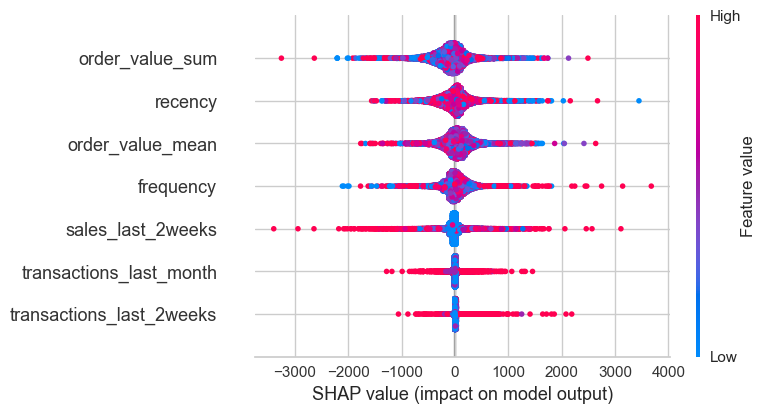

In [36]:
# EXTRACTING INSIGHTS -------
# - Explainable AI (XAI) can be used to understand the model
reg.interpret_model(xgb_reg_model)

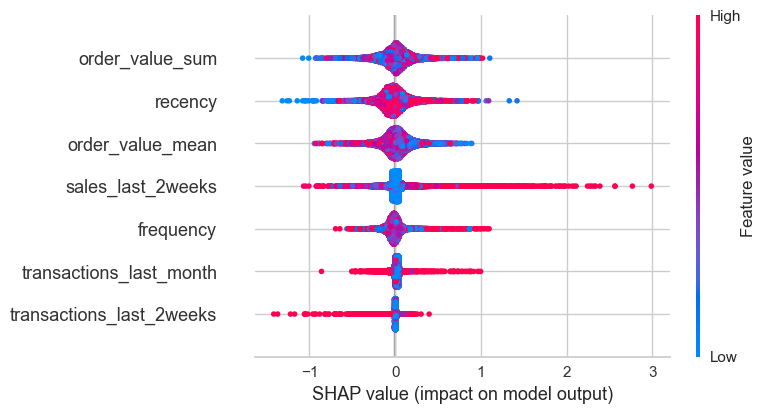

In [37]:
clf.interpret_model(xgb_clf_model)

In [38]:
# BUSINESS VALUE ----------
# - What would happen if you could increase revenue by 10%?
reg_predictions_data['prediction_label'].sum()

622213060.0

In [39]:
# Its easier than you think
top_20_customers = reg_predictions_data.head(20).index.to_list()

In [40]:
# Increase *FREQUENCY* of purchases : sell them these
data.query('user_id in @top_20_customers')\
                 .groupby('category')\
                 .size()\
                 .to_frame()\
                 .set_axis(['count'], axis = 1)\
                 .sort_values('count', ascending = False)

count
category          
Clothing       115
Home Goods      95
Electronics     89

In [41]:
# Increase *SIZE* (how much they spend on purchases) of purchases : sell them these
data[['user_id', 'category', 'order_value']]\
    .query('user_id in @top_20_customers')\
    .groupby('category')\
    .sum()\
    .sort_values('order_value', ascending = False)

user_id  order_value
category                         
Clothing     5438374    302647.42
Home Goods   4145383    241809.07
Electronics  4373686    234175.12

In [42]:
# KEY BUSINESS INSIGHTS ----------
''' 1. Increasing CLV 90 - Day Sales Value - If we want to increase sales value, we should focus on the customers with the 
highest historical sales / order values & get them to spend more (i.e. order_value_sum)'''

reg_predictions_data

recency  frequency  order_value_sum  order_value_mean  \
user_id                                                          
40532        -23         12         15710.43           1309.20   
27075       -212          2          4681.31           2340.66   
93990         -4          3          3916.39           1305.46   
49226          0          9         12103.05           1344.78   
1214           0         11         32207.41           2927.95   
...          ...        ...              ...               ...   
13715        -58         16         30110.46           1881.90   
95565          0          3          9121.81           3040.60   
83253         -8          4          5366.83           1341.71   
18828        -12          9         21154.99           2350.55   
97474         -8          3          8475.78           2825.26   

         transactions_last_month  transactions_last_2weeks  sales_last_2weeks  \
user_id                                                                         
40532                       1.00                      0.00               0.00   
27075                       0.00                      0.00               0.00   
93990                       2.00                      2.00            2814.62   
49226                       1.00                      1.00            1388.58   
1214                        2.00                      2.00            7987.35   
...                          ...                       ...                ...   
13715                       0.00                      0.00               0.00   
95565                       2.00                      2.00            8638.58   
83253                       1.00                      1.00            4026.76   
18828                       2.00                      2.00            8312.81   
97474                       3.00                      2.00            7312.39   

         order_value_90_flag  90_day_order_value  prediction_label  
user_id                                                             
40532                   1.00            22380.10          16903.08  
27075                   1.00            29772.97          16739.45  
93990                   1.00            22566.19          16719.07  
49226                   1.00            29531.87          16423.56  
1214                    1.00            23866.69          15796.04  
...                      ...                 ...               ...  
13715                   0.00                0.00            839.34  
95565                   1.00             1435.40            821.28  
83253                   0.00                0.00            803.38  
18828                   1.00             9969.81            641.34  
97474                   1.00              489.51            158.44  

[99927 rows x 10 columns]

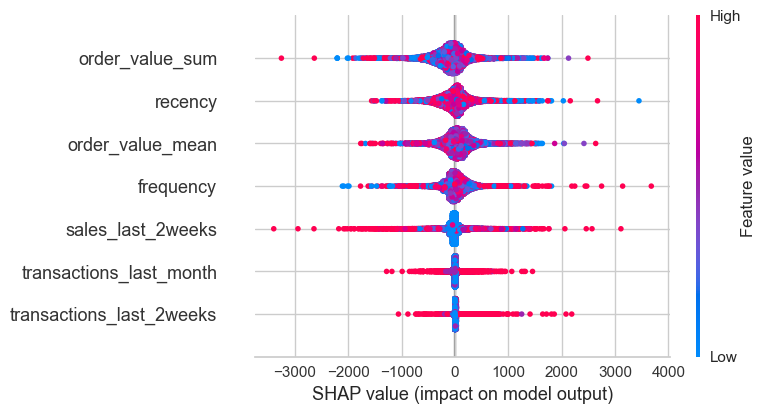

In [43]:
reg.interpret_model(xgb_reg_model)

In [44]:
'''2. Increasing CLV 90 - Day Sales Probability - If we want to increase the probability of a customer making a 
purchase within the next 90 days, we should focus on the customers with the highest transactions last month & ensure
they keep buying. Recency is the most important metric to increase the probability of a customer making a purchase
in the next 90 days.'''

clf_predictions_data

recency  frequency  order_value_sum  order_value_mean  \
user_id                                                          
80505         -1         14         49244.72           3517.48   
43742          0         13         40813.06           3139.47   
44804        -12         16         50483.09           3155.19   
61480          0         14         43410.67           3100.76   
4438          -7         14         41837.80           2988.41   
...          ...        ...              ...               ...   
12182         -6          9         25117.00           2790.78   
5057          -5          8         24998.69           3124.84   
1883           0         11         35751.89           3250.17   
56399         -5          8         24958.66           3119.83   
68704        -11          6         25496.46           4249.41   

         transactions_last_month  transactions_last_2weeks  sales_last_2weeks  \
user_id                                                                         
80505                       2.00                      2.00           10748.64   
43742                       3.00                      3.00           12123.35   
44804                       2.00                      2.00            8889.94   
61480                       3.00                      3.00            9090.80   
4438                        3.00                      2.00            9085.77   
...                          ...                       ...                ...   
12182                       3.00                      3.00            8741.50   
5057                        4.00                      3.00            7387.22   
1883                        5.00                      4.00           14329.97   
56399                       4.00                      3.00            7396.26   
68704                       3.00                      2.00            8599.19   

         90_day_order_value  order_value_90_flag  prediction_label  \
user_id                                                              
80505               8583.72                 1.00                 1   
43742                832.97                 1.00                 1   
44804                553.83                 1.00                 1   
61480               1573.61                 1.00                 1   
4438                4598.57                 1.00                 1   
...                     ...                  ...               ...   
12182                  0.00                 0.00                 0   
5057                 311.21                 1.00                 0   
1883                   0.00                 0.00                 0   
56399                  0.00                 0.00                 0   
68704                  0.00                 0.00                 0   

         prediction_score_0  prediction_score_1  
user_id                                          
80505                  0.00                1.00  
43742                  0.00                1.00  
44804                  0.00                1.00  
61480                  0.00                1.00  
4438                   0.00                1.00  
...                     ...                 ...  
12182                  0.73                0.27  
5057                   0.76                0.24  
1883                   0.76                0.24  
56399                  0.78                0.22  
68704                  0.81                0.19  

[99927 rows x 12 columns]

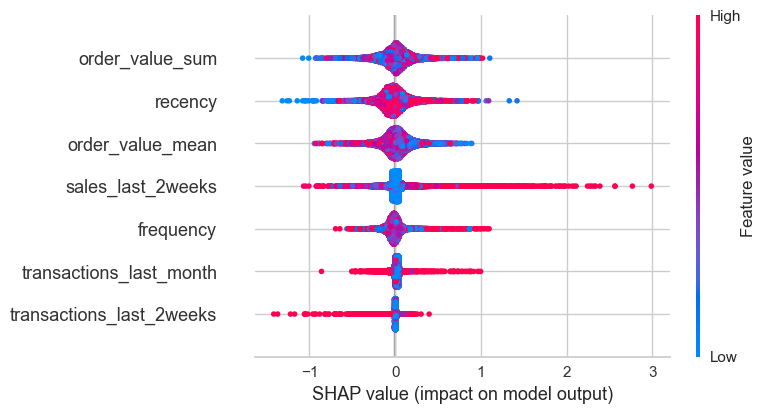

In [45]:
clf.interpret_model(xgb_clf_model)

In [46]:
clf.interpret_model(xgb_clf_model, plot = 'msa')

In [47]:
from pycaret.classification import *
evaluate_model(xgb_clf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [48]:
evaluate_model(xgb_reg_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
# Run the classification model to get churn probabilities
clf_predictions_data = clf.predict_model(xgb_clf_model, data=features_data, raw_score=True)
# Reset index to access user_id as a column
clf_predictions_data = clf_predictions_data.reset_index()
# Extract the churn probability (probability that order_value_90_flag = 1)
clf_predictions_data = clf_predictions_data[['user_id', 'prediction_score_1']]
clf_predictions_data.columns = ['user_id', 'churn_probability_1']

In [55]:
# Merge churn probabilities into the features_data dataframe
features_data_with_churn = features_data.merge(clf_predictions_data, on='user_id', how='left')

# Fill any missing values (e.g., if some users were not in the classification output)
#features_data_with_churn['churn_probability'].fillna(0, inplace=rue)

In [56]:
# Run regression model with churn probability as an additional feature
reg_setup_with_churn = reg.setup(
            data=features_data_with_churn.drop('order_value_90_flag', axis=1),
            target='90_day_order_value',
            train_size=0.8,
            normalize=True,
            session_id=123,
            verbose=True,
            log_experiment=False)

# Create the model
xgb_reg_model_with_churn = reg.create_model('xgboost')

# Get predictions
reg_predictions_data_with_churn = reg.predict_model(xgb_reg_model_with_churn, data=features_data_with_churn)\
                                     .sort_values('prediction_label', ascending=False)


In [63]:
reg_predictions_data_with_churn

user_id  recency  frequency  order_value_sum  order_value_mean  \
12247    12255       -3          8         21659.89           2707.49   
44477    44512      -13          9         31591.59           3510.18   
51007    51047       -3         15         47732.71           3182.18   
74006    74069      -30          1          4921.22           4921.22   
48014    48052      -35          1          4670.70           4670.70   
...        ...      ...        ...              ...               ...   
12174    12182       -6          9         25117.00           2790.78   
5054      5057       -5          8         24998.69           3124.84   
1881      1883        0         11         35751.89           3250.17   
56354    56399       -5          8         24958.66           3119.83   
68646    68704      -11          6         25496.46           4249.41   

       transactions_last_month  transactions_last_2weeks  sales_last_2weeks  \
12247                     1.00                      1.00            2483.39   
44477                     1.00                      1.00            2330.71   
51007                     3.00                      2.00            6374.23   
74006                     0.00                      0.00               0.00   
48014                     0.00                      0.00               0.00   
...                        ...                       ...                ...   
12174                     3.00                      3.00            8741.50   
5054                      4.00                      3.00            7387.22   
1881                      5.00                      4.00           14329.97   
56354                     4.00                      3.00            7396.26   
68646                     3.00                      2.00            8599.19   

       order_value_90_flag  churn_probability_0  churn_probability_1  \
12247                 1.00                 0.03                 0.97   
44477                 1.00                 0.05                 0.95   
51007                 1.00                 0.04                 0.96   
74006                 1.00                 0.00                 1.00   
48014                 1.00                 0.00                 1.00   
...                    ...                  ...                  ...   
12174                 0.00                 0.73                 0.27   
5054                  1.00                 0.76                 0.24   
1881                  0.00                 0.76                 0.24   
56354                 0.00                 0.78                 0.22   
68646                 0.00                 0.81                 0.19   

       90_day_order_value  prediction_label  
12247             4033.37           7709.30  
44477            16108.31           7598.73  
51007              101.47           7598.61  
74006             8511.60           7386.46  
48014             2004.61           7351.96  
...                   ...               ...  
12174                0.00          -2283.90  
5054               311.21          -2633.77  
1881                 0.00          -2778.34  
56354                0.00          -2842.77  
68646                0.00          -3353.11  

[99927 rows x 13 columns]

In [62]:
evaluate_model(xgb_reg_model_with_churn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Error in callback <function flush_figures at 0x00000234AAE0DE40> (for post_execute):


KeyboardInterrupt: 

In [59]:
# Tune the XGBoost model (regression model for predicting customer spend)
tuned_xgb_reg_model = reg.tune_model(xgb_reg_model_with_churn, optimize='RMSE')


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [60]:
# Display the tuned model’s performance
reg_predictions_tuned = reg.predict_model(tuned_xgb_reg_model)
